In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from os import listdir
from os.path import isfile, join

import scipy.sparse

import time

sns.set()

In [2]:
%matplotlib inline

## 1. Load prepared data

Load song master table and reduced table

In [289]:
# Load master song table with added metadata
master = pd.read_pickle('../data/master200.pkl')
master_reduced = pd.read_pickle('../data/final/master_reduced.pkl')

song_ids = master_reduced.index.values
cont_feats = list(master_reduced.drop(['artist_name', 'album_name'], 1).columns)

In [4]:
master.head(3)

,artist_name,artist_uri,track_name,album_uri,duration_ms,album_name,count,track_uri,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,artist_genres,artist_popularity,album_genres,album_popularity,album_release_date
song_id,,,,,,,,,,,,,,,,,,,,,
0,Sidney Bechet's Blue Note Jazzmen,spotify:artist:2XouUSO0EAJ9gMMoHiXqMt,Muskrat Ramble,spotify:album:04hQBJ7YSuNnZ0nbuXNYbY,220293,Jazz Classics,1,spotify:track:0002yNGLtYSYtc0X6ZnFvp,0.455,0.623,...,0.903,0.634,0.951,182.345,4,[],18,[],37,1993-01-01
159583,Sidney Bechet,spotify:artist:1RsmXc1ZqW3WBs9iwxiSwk,Blue Horizon,spotify:album:04hQBJ7YSuNnZ0nbuXNYbY,264933,Jazz Classics,5,spotify:track:1EWPMNHfdVNJwBpG9BcxXB,0.327,0.372,...,0.835,0.153,0.380,66.036,4,"['bebop', 'big band', 'cool jazz', 'dixieland'...",52,[],37,1993-01-01
271702,Sidney Bechet,spotify:artist:1RsmXc1ZqW3WBs9iwxiSwk,Blame It On The Blues - Alternate Take,spotify:album:04hQBJ7YSuNnZ0nbuXNYbY,175893,Jazz Classics,1,spotify:track:26N4Y48EjprAtvlY6yWZTA,0.574,0.606,...,0.948,0.349,0.965,101.361,4,"['bebop', 'big band', 'cool jazz', 'dixieland'...",52,[],37,1993-01-01


In [5]:
encoded_cont = np.load('../data/final/encoded_cont_5wide.npy', allow_pickle = True)

In [6]:
encoded_cont.shape

(213675, 5)

In [9]:
indicators = scipy.sparse.load_npz('../data/final/indicators.npz')

In [10]:
indicators.shape

(213675, 187313)

## Visualise clusters with t-SNE
Visualise clusters with t-SNE

In [11]:
# Data already shuffled, so we can pull a random subset of train data for visualisation
np.random.seed(42)
tsne_ind = np.random.choice(np.arange(encoded_cont.shape[0]), 10000)

Code heavily borrowed from:  
https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

In [17]:
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
#tsne = TSNE(n_components = 2, verbose = 1, n_iter = 300)
tsne_results = tsne.fit_transform(encoded_cont[tsne_ind])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.003s...
[t-SNE] Computed neighbors for 10000 samples in 0.540s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.048215
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.583336
[t-SNE] KL divergence after 300 iterations: 2.649238
t-SNE done! Time elapsed:

In [116]:
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components = 2, verbose = 0, perplexity = 50, n_iter = 300)
#tsne = TSNE(n_components = 2, verbose = 1, n_iter = 300)
tsne_results = tsne.fit_transform(encoded_cont)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 213675 samples in 0.176s...
[t-SNE] Computed neighbors for 213675 samples in 46.207s...
[t-SNE] Computed conditional probabilities for sample 1000 / 213675
[t-SNE] Computed conditional probabilities for sample 2000 / 213675
[t-SNE] Computed conditional probabilities for sample 3000 / 213675
[t-SNE] Computed conditional probabilities for sample 4000 / 213675
[t-SNE] Computed conditional probabilities for sample 5000 / 213675
[t-SNE] Computed conditional probabilities for sample 6000 / 213675
[t-SNE] Computed conditional probabilities for sample 7000 / 213675
[t-SNE] Computed conditional probabilities for sample 8000 / 213675
[t-SNE] Computed conditional probabilities for sample 9000 / 213675
[t-SNE] Computed conditional probabilities for sample 10000 / 213675
[t-SNE] Computed conditional probabilities for sample 11000 / 213675
[t-SNE] Computed conditional probabilities for sample 12000 / 213675
[t-SNE] Computed conditional proba

[t-SNE] Computed conditional probabilities for sample 123000 / 213675
[t-SNE] Computed conditional probabilities for sample 124000 / 213675
[t-SNE] Computed conditional probabilities for sample 125000 / 213675
[t-SNE] Computed conditional probabilities for sample 126000 / 213675
[t-SNE] Computed conditional probabilities for sample 127000 / 213675
[t-SNE] Computed conditional probabilities for sample 128000 / 213675
[t-SNE] Computed conditional probabilities for sample 129000 / 213675
[t-SNE] Computed conditional probabilities for sample 130000 / 213675
[t-SNE] Computed conditional probabilities for sample 131000 / 213675
[t-SNE] Computed conditional probabilities for sample 132000 / 213675
[t-SNE] Computed conditional probabilities for sample 133000 / 213675
[t-SNE] Computed conditional probabilities for sample 134000 / 213675
[t-SNE] Computed conditional probabilities for sample 135000 / 213675
[t-SNE] Computed conditional probabilities for sample 136000 / 213675
[t-SNE] Computed con

# HDBSAN clustering
- The HDBSCAN clustering library: https://hdbscan.readthedocs.io/en/latest/
- How HDBSCAN works: https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html
- Parameter selection: https://hdbscan.readthedocs.io/en/latest/parameter_selection.html

In [53]:
import hdbscan as h

In [54]:
hdb = h.HDBSCAN(min_cluster_size = 100, cluster_selection_method = 'leaf')

In [55]:
hdb.fit(encoded_cont)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_method='leaf',
        core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=100, min_samples=None, p=None,
        prediction_data=False)

Number of clusters

In [56]:
np.max(hdb.labels_)+1

18

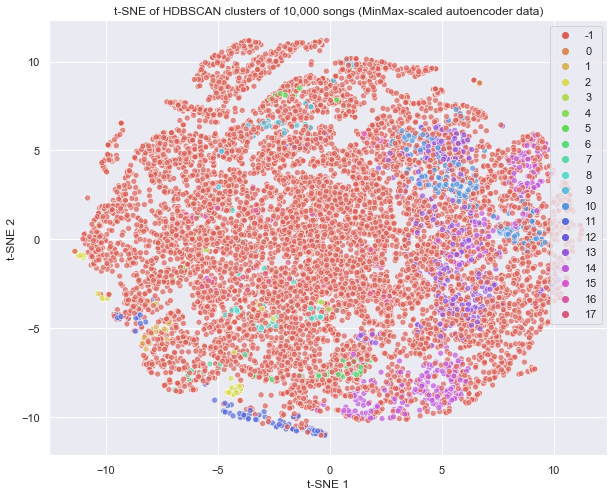

In [156]:
plt.figure(figsize=(10, 8))

ax = sns.scatterplot(
    x = tsne_results[tsne_ind, 0], 
    y = tsne_results[tsne_ind, 1],
    hue = hdb.labels_[tsne_ind],
    palette = sns.color_palette("hls", len(np.unique(hdb.labels_[tsne_ind]))),
    legend = "full",
    alpha = 0.7
)

ax.set(title = 't-SNE of HDBSCAN clusters of 10,000 songs (MinMax-scaled autoencoder data)', 
       xlabel = 't-SNE 1', ylabel = 't-SNE 2')
plt.savefig('hdbscan_subset.pdf')

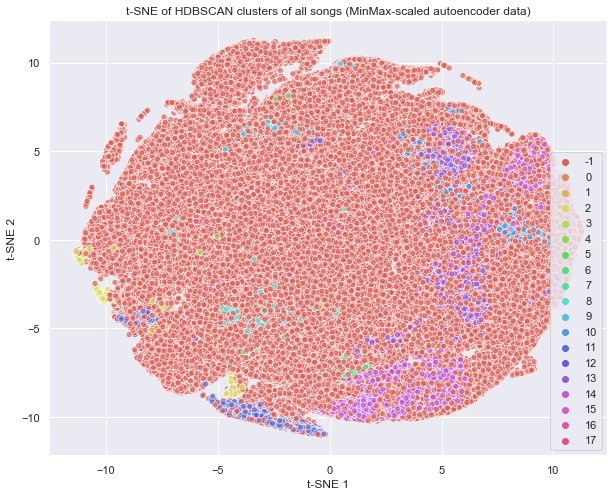

In [160]:
plt.figure(figsize=(10, 8))

ax = sns.scatterplot(
    x = tsne_results[:, 0], 
    y = tsne_results[:, 1],
    hue = hdb.labels_,
    palette = sns.color_palette("hls", len(np.unique(hdb.labels_))),
    legend = "full",
    alpha = 0.7
)

ax.set(title = 't-SNE of HDBSCAN clusters of all songs (MinMax-scaled autoencoder data)', 
       xlabel = 't-SNE 1', ylabel = 't-SNE 2')
plt.savefig('hdbscan_all.pdf')

# K-Means Clustering
Use data encoded into compressed representation to fit a clustering algorithm to group songs.

The number of clusters here maps directly to the number of families of playlists we can generate. Every song will be predicted to belong to a cluster, and the rest of the playlist generated with songs from that cluster.  
  
Read about K-Means:
- https://stats.stackexchange.com/questions/78313/clustering-inertia-formula-in-scikit-learn
- https://pythonprogramminglanguage.com/How-is-the-k-nearest-neighbor-algorithm-different-from-k-means-clustering/
- https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_jobs = -1, n_clusters = 15, n_init = 20, 
                max_iter = 300, random_state = 42, verbose = 0)

kmeans.fit(encoded_cont)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=20, n_jobs=-1, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [14]:
cluster_centers = kmeans.cluster_centers_

k_labels = kmeans.labels_

In [177]:
# Sizes of fit clusters (num songs in each)
clust, count = np.unique(k_labels, return_counts = True)
for cl, co in zip(clust, count):
    print(cl, ':', co)

0 : 17434
1 : 7447
2 : 16620
3 : 10878
4 : 17170
5 : 10155
6 : 12500
7 : 20787
8 : 12098
9 : 11318
10 : 21551
11 : 5942
12 : 20485
13 : 8673
14 : 20617


Plotting t-SNE space calculated on random 10,000 subset of songs.

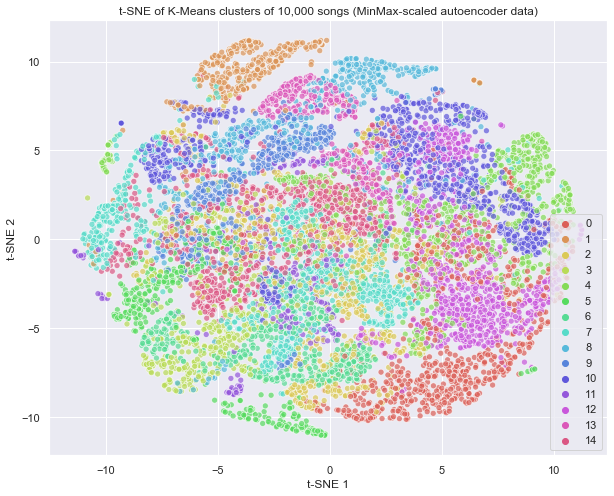

In [155]:
plt.figure(figsize=(10, 8))

ax = sns.scatterplot(
    x = tsne_results[tsne_ind, 0], 
    y = tsne_results[tsne_ind, 1],
    hue = k_labels[tsne_ind],
    palette = sns.color_palette("hls", len(np.unique(k_labels[tsne_ind]))),
    legend = "full",
    alpha = 0.7
)

ax.set(title = 't-SNE of K-Means clusters of 10,000 songs (MinMax-scaled autoencoder data)', 
       xlabel = 't-SNE 1', ylabel = 't-SNE 2')

plt.savefig('kmeans_subset.pdf')

Plot cluster predicted by K-Means for all songs, shown in t-SNE space.

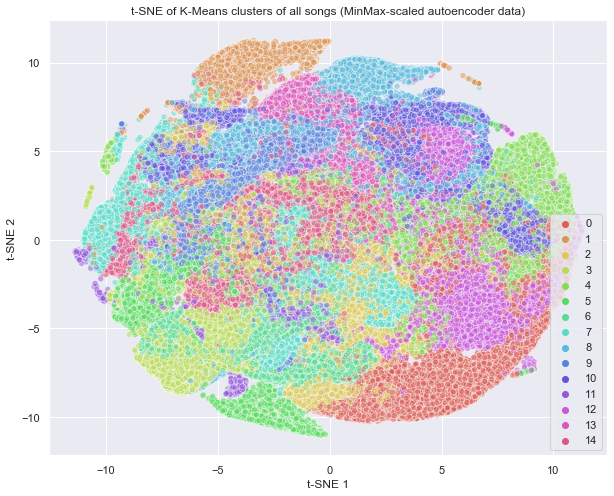

In [162]:
plt.figure(figsize=(10, 8))

ax = sns.scatterplot(
    x = tsne_results[:, 0], 
    y = tsne_results[:, 1],
    hue = k_labels,
    palette = sns.color_palette("hls", len(np.unique(k_labels))),
    legend = "full",
    alpha = 0.5
)

ax.set(title = 't-SNE of K-Means clusters of all songs (MinMax-scaled autoencoder data)', 
       xlabel = 't-SNE 1', ylabel = 't-SNE 2')

plt.savefig('kmeans_all.pdf')

## Plot playlists in t-SNE space

Plot one playlist (ind 4) in the t-SNE space, with component songs coloured by their cluster predicted by K-Means.

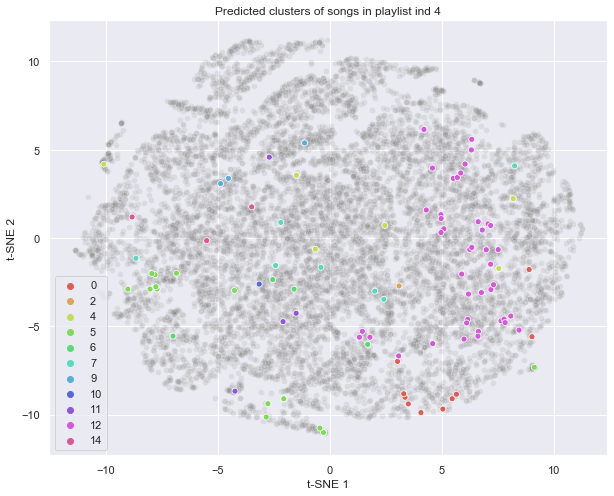

In [174]:
plt.figure(figsize=(10, 8))

ax = sns.scatterplot(
    x = tsne_results[tsne_ind, 0], 
    y = tsne_results[tsne_ind, 1],
    #hue = k_labels[tsne_ind],
    #palette = sns.color_palette("hls", len(np.unique(k_labels[tsne_ind]))),
    legend = "full",
    color = 'grey',
    alpha = 0.15
)

ax = sns.scatterplot(
    x = tsne_results[list(np.argwhere(indicators[:, 4].A.reshape((-1,)) == 1).reshape((-1,))), 0], 
    y = tsne_results[list(np.argwhere(indicators[:, 4].A.reshape((-1,)) == 1).reshape((-1,))), 1],
    hue = k_labels[list(np.argwhere(indicators[:, 4].A.reshape((-1,)) == 1).reshape((-1,)))],
    palette = sns.color_palette("hls", len(np.unique(k_labels[list(np.argwhere(indicators[:, 4].A.reshape((-1,)) == 1).reshape((-1,)))]))),
    legend = "full",
    alpha = 1
)

ax.set(title = 'Predicted clusters of songs in playlist ind 4', 
       xlabel = 't-SNE 1', ylabel = 't-SNE 2')

plt.savefig('playlist_songs_clusters.pdf'.format(time.time()))

In [179]:
np.unique(
    kmeans.labels_[list(np.argwhere(indicators[:, 4].A.reshape((-1,)) == 1).reshape((-1,)))], 
    return_counts = True
)

(array([ 0,  2,  4,  5,  6,  7,  9, 10, 11, 12, 14], dtype=int32),
 array([10,  1,  6, 15,  4,  7,  3,  1,  4, 43,  3]))

In [138]:
kmeans.labels_[list(np.argwhere(indicators[:, 4].A.reshape((-1,)) == 1).reshape((-1,)))]

array([12, 12,  5,  4, 12,  4, 12,  0, 12, 12, 12, 12, 12,  6, 12, 12,  4,
       12, 12, 12, 12,  4, 12, 12,  6, 12,  7, 12, 14,  4, 12,  7, 12,  0,
        4,  5, 11,  5,  5,  9,  5, 10,  9,  9,  0, 12, 14,  7, 12, 12, 12,
       12,  0, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  0,  0,  2, 12,
       12, 12,  0,  0,  0,  6,  0,  6, 12, 12, 12, 14,  7,  7,  7, 11,  7,
        5,  5,  5,  5, 11,  5,  5, 11,  5,  5,  5,  5], dtype=int32)

Plot four playlists by colour (independent of clustering, just colour-coded to tell playlists apart) in the t-SNE space to see how they spread out in that space.

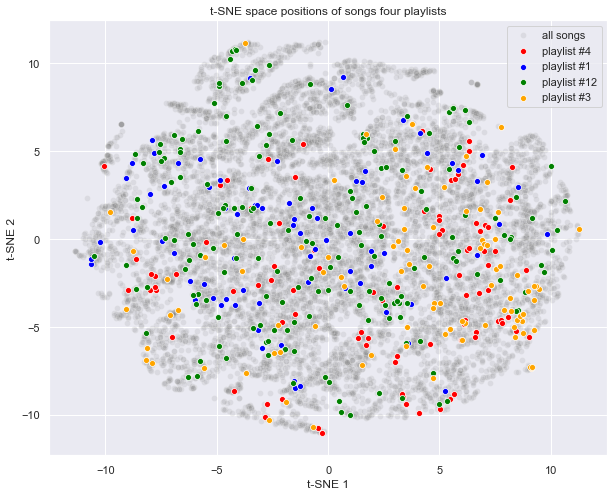

In [175]:
plt.figure(figsize=(10, 8))

ax = sns.scatterplot(
    x = tsne_results[tsne_ind, 0], 
    y = tsne_results[tsne_ind, 1],
    #hue = k_labels[tsne_ind],
    #palette = sns.color_palette("hls", len(np.unique(k_labels[tsne_ind]))),
    legend = "full",
    color = 'grey',
    alpha = 0.15,
    label = 'all songs'
)

psi = list(np.argwhere(indicators[:, 4].A.reshape((-1,)) == 1).reshape((-1,)))
ax = sns.scatterplot(
    x = tsne_results[psi, 0], 
    y = tsne_results[psi, 1],
    color = 'red',
    alpha = 1.0,
    label = 'playlist #4'
)

psi = list(np.argwhere(indicators[:, 1].A.reshape((-1,)) == 1).reshape((-1,)))
ax = sns.scatterplot(
    x = tsne_results[psi, 0], 
    y = tsne_results[psi, 1],
    color = 'blue',
    alpha = 1.0,
    label = 'playlist #1'
)

psi = list(np.argwhere(indicators[:, 12].A.reshape((-1,)) == 1).reshape((-1,)))
ax = sns.scatterplot(
    x = tsne_results[psi, 0], 
    y = tsne_results[psi, 1],
    color = 'green',
    alpha = 1.0,
    label = 'playlist #12'
)

psi = list(np.argwhere(indicators[:, 3].A.reshape((-1,)) == 1).reshape((-1,)))
ax = sns.scatterplot(
    x = tsne_results[psi, 0], 
    y = tsne_results[psi, 1],
    color = 'orange',
    alpha = 1.0,
    label = 'playlist #3'
)

ax.legend()

ax.set(title = 't-SNE space positions of songs four playlists',
       xlabel = 't-SNE 1', ylabel = 't-SNE 2')

plt.savefig('playlist_songs_in_space.pdf'.format(time.time()))

# Use clustering to generate playlist from cold start

### Use first playlist as test bed

In [405]:
p_id = 0

playlist = indicators[:, p_id].A.reshape((-1,))

playlist_song_ind = list(np.argwhere(playlist == 1).reshape((-1,)))

playlist_song_ids = list(song_ids[playlist_song_ind].reshape((-1,)))
playlist_song_ids

[125250,
 787744,
 340039,
 603984,
 461894,
 653897,
 881533,
 894661,
 810569,
 49614,
 776037,
 356319]

K-Means clusters of songs in playlist

In [406]:
playlist_song_clust = kmeans.labels_[playlist_song_ind]
playlist_song_clust

array([12,  0, 12, 12, 12,  5,  5,  0,  6, 12, 12, 12], dtype=int32)

Show songs in first human-generated playlist

In [407]:
master.loc[playlist_song_ids]

,artist_name,artist_uri,track_name,album_uri,duration_ms,album_name,count,track_uri,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,artist_genres,artist_popularity,album_genres,album_popularity,album_release_date
song_id,,,,,,,,,,,,,,,,,,,,,
125250,Rachael Yamagata,spotify:artist:7w0qj2HiAPIeUcoPogvOZ6,Elephants,spotify:album:6KzK9fDNmj7GHFbcE4gVJD,253701,Elephants...Teeth Sinking Into Heart,14,spotify:track:0y4TKcc7p2H6P0GJlt01EI,0.312,0.2070,...,0.008180,0.0773,0.2780,93.778,4,"['acoustic pop', 'folk-pop', 'lilith']",52,[],40,2008-10-06
787744,Glee Cast,spotify:artist:0SCbttzoZTnLFebDYmAWCm,Somewhere Only We Know (Glee Cast Version),spotify:album:6WlzaRoDShdgVgaqJRjyNH,184653,"Glee: The Music, The Complete Season Two",86,spotify:track:66mmvchQ4C3LnPzq4DiAI3,0.493,0.5520,...,0.000000,0.0969,0.3060,85.973,4,"['glee club', 'hollywood', 'post-teen pop']",80,[],49,2010
340039,Sleeping At Last,spotify:artist:0MeLMJJcouYXCymQSHPn8g,Chasing Cars,spotify:album:0UIIvTTWNB3gRQWFoxoEDh,242564,"Covers, Vol. 2",401,spotify:track:2d7LPtieXdIYzf7yHPooWd,0.467,0.1570,...,0.000001,0.0816,0.2770,108.130,4,"['ambient worship', 'dreamo', 'folk-pop', 'pop']",75,[],67,2016-11-04
603984,Rihanna,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H,Close To You,spotify:album:3Q149ZH46Z0f3oDR7vlDYV,223226,ANTI,500,spotify:track:4gFxywaJejXWxo0NjlWzgg,0.494,0.1700,...,0.000000,0.1390,0.1450,80.098,4,"['barbadian pop', 'dance pop', 'pop', 'post-te...",91,[],58,2016-01-28
461894,Mayday Parade,spotify:artist:3WfJ1OtrWI7RViX9DMyEGy,Terrible Things,spotify:album:4eVvdwd6AC7nh9TvJD9XyT,238076,Valdosta EP,339,spotify:track:3ZjnFYlal0fXN6t61wdxhl,0.285,0.3710,...,0.003920,0.1040,0.3720,154.989,3,"['emo', 'neon pop punk', 'pop emo', 'pop punk']",68,[],53,2009-10-06
653897,The Cinematic Orchestra,spotify:artist:32ogthv0BdaSMPml02X9YB,To Build A Home,spotify:album:5cPHT4yMCfETLRYAoBFcOZ,371320,Ma Fleur,1593,spotify:track:54KFQB6N4pn926IUUYZGzK,0.264,0.1220,...,0.349000,0.0940,0.0735,148.658,4,"['acid jazz', 'chamber pop', 'downtempo', 'ele...",65,[],63,2007-05-07
881533,The Cinematic Orchestra,spotify:artist:32ogthv0BdaSMPml02X9YB,That Home,spotify:album:5cPHT4yMCfETLRYAoBFcOZ,103920,Ma Fleur,121,spotify:track:6q4c1vPRZREh7nw3wG7Ixz,0.412,0.1590,...,0.772000,0.0830,0.0389,85.462,4,"['acid jazz', 'chamber pop', 'downtempo', 'ele...",65,[],63,2007-05-07
894661,Shawn Mendes,spotify:artist:7n2wHs1TKAczGzO7Dd2rGr,Never Be Alone,spotify:album:5wKylB0Zwnxz046O7po25D,215813,Handwritten,626,spotify:track:6wQSrFnJYm3evLsavFeCVT,0.376,0.4660,...,0.000058,0.0781,0.2760,199.835,4,"['canadian pop', 'pop', 'post-teen pop', 'vira...",93,[],18,2015-04-13
810569,Josef Salvat,spotify:artist:64PJHZDQTPPVBCdwnv22Wz,Diamonds,spotify:album:1excMWyBjh9UJqk2xYZ7o0,247600,Night Swim,44,spotify:track:6Hki3HcbeU2c4T72lJjyZ5,0.462,0.3720,...,0.000452,0.1020,0.2760,169.931,4,['gauze pop'],53,[],35,2015-10-23


### Make this a lot simpler:
Don't worry about efficiency, just make it work

In [408]:
# Provide algorithm with seed song as a song ID: get everything from that
seed_id = playlist_song_ids[0]
master.loc[seed_id]

artist_name                                 Rachael Yamagata
artist_uri             spotify:artist:7w0qj2HiAPIeUcoPogvOZ6
track_name                                         Elephants
album_uri               spotify:album:6KzK9fDNmj7GHFbcE4gVJD
duration_ms                                           253701
album_name              Elephants...Teeth Sinking Into Heart
count                                                     14
track_uri               spotify:track:0y4TKcc7p2H6P0GJlt01EI
danceability                                           0.312
energy                                                 0.207
key                                                       10
loudness                                             -13.367
mode                                                       1
speechiness                                           0.0347
acousticness                                           0.961
instrumentalness                                     0.00818
liveness                

In [409]:
# Find index in dataset of seed song
seed_ind = np.argwhere(song_ids == seed_id)[0][0]
seed_ind

7944

In [410]:
# Predict cluster of seed song
seed_clust = kmeans.predict(encoded_cont[seed_ind, :].reshape((1,-1)))[0]
seed_clust

12

In [411]:
# Get indices of all songs in that cluster
clust_inds = np.argwhere(kmeans.labels_ == seed_clust).reshape((-1,))
clust_inds.shape

(20485,)

In [412]:
# Calculate playlist co-occurrence cosine distance between seed and all songs in same cluster
clust_seed_dist = cosine_distances(indicators[clust_inds], indicators[seed_ind]).reshape((-1,))
clust_seed_dist.shape

(20485,)

In [413]:
# Spot check tails to verify that distances aren't nonsense (e.g. all 1's)
np.sort(clust_seed_dist)

array([1.11022302e-16, 8.70359255e-01, 8.80477139e-01, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [414]:
# Sort indices of songs by distance to seed (co-occurrence)
closest_songs_ind = np.argsort(clust_seed_dist)
closest_songs_ind[0:5]

array([  766,  7520, 17192, 13468, 10415])

In [415]:
# Get the song IDs corresponding to those songs
closest_songs_id = song_ids[clust_inds][closest_songs_ind]
# As expected, the seed song is the closest neighbour
closest_songs_id[0:5]

array([125250, 521562, 541794, 460009, 244264])

Algorithm to generate playlist

In [459]:
seed_song_ids = playlist_song_ids[0:6]

playlist_length = 100

# Start with seed songs, those are included too
new_song_ids = seed_song_ids.copy()

while len(new_song_ids) < playlist_length:
    # Pick a seed song at random
    seed_id = np.random.choice(seed_song_ids)
    # Find index in dataset of seed song
    seed_ind = np.argwhere(song_ids == seed_id)[0][0]
    # Predict cluster of seed song
    seed_clust = kmeans.predict(encoded_cont[seed_ind, :].reshape((1,-1)))[0]
    # Get indices of all songs in that cluster
    clust_inds = np.argwhere(kmeans.labels_ == seed_clust).reshape((-1,))
    # Calculate playlist co-occurrence cosine distance between seed and all songs in same cluster
    clust_seed_dist = cosine_distances(indicators[clust_inds], indicators[seed_ind]).reshape((-1,))
    # Sort indices of songs by distance to seed (co-occurrence)
    closest_songs_ind = np.argsort(clust_seed_dist)
    # Get the song IDs corresponding to those songs
    closest_songs_ids = song_ids[clust_inds][closest_songs_ind]
    
    print('Pulled ID {} cluster {}'.format(seed_id, seed_clust))
    
    # Find first of closest songs that is not already in new playlist
    # Can stop iterator at playlist length: if true that far, playlist is full anyway
    closest_songs_in_playlist = [sid in new_song_ids for sid in closest_songs_ids]
    print(closest_songs_in_playlist[0:5])
    
    new_song_ids.append(closest_songs_ids[np.argmin(closest_songs_in_playlist)])
    
    print('Added ID', new_song_ids[-1], '\n')

Pulled ID 461894 cluster 12
[True, False, False, False, False]
Added ID 180192 

Pulled ID 125250 cluster 12
[True, False, False, False, False]
Added ID 521562 

Pulled ID 603984 cluster 12
[True, False, False, False, False]
Added ID 834653 

Pulled ID 125250 cluster 12
[True, True, False, False, False]
Added ID 541794 

Pulled ID 340039 cluster 12
[True, False, False, False, False]
Added ID 772125 

Pulled ID 653897 cluster 5
[True, False, False, False, False]
Added ID 686226 

Pulled ID 461894 cluster 12
[True, True, False, False, False]
Added ID 994457 

Pulled ID 603984 cluster 12
[True, True, False, False, False]
Added ID 468524 

Pulled ID 125250 cluster 12
[True, True, True, False, False]
Added ID 460009 

Pulled ID 461894 cluster 12
[True, True, True, False, False]
Added ID 479902 

Pulled ID 787744 cluster 0
[True, False, False, False, False]
Added ID 195814 

Pulled ID 603984 cluster 12
[True, True, True, False, False]
Added ID 613612 

Pulled ID 653897 cluster 5
[True, True,

In [443]:
print(playlist_song_ids[0:6])

[125250, 787744, 340039, 603984, 461894, 653897]


In [444]:
playlist_song_clust[0:6]

array([12,  0, 12, 12, 12,  5], dtype=int32)

In [445]:
# No duplicate songs
len(set(new_song_ids)) == len(new_song_ids)

# Print song IDs of our new playlist
new_song_ids

[125250,
 787744,
 340039,
 603984,
 461894,
 653897,
 180192,
 195814,
 834653,
 686226,
 583518,
 597665,
 29049,
 994457,
 479902,
 521562,
 336835,
 541794,
 500253,
 468524]

In [450]:
# Inspect our new playlist
master.loc[new_song_ids]

,artist_name,artist_uri,track_name,album_uri,duration_ms,album_name,count,track_uri,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,artist_genres,artist_popularity,album_genres,album_popularity,album_release_date
song_id,,,,,,,,,,,,,,,,,,,,,
125250,Rachael Yamagata,spotify:artist:7w0qj2HiAPIeUcoPogvOZ6,Elephants,spotify:album:6KzK9fDNmj7GHFbcE4gVJD,253701,Elephants...Teeth Sinking Into Heart,14,spotify:track:0y4TKcc7p2H6P0GJlt01EI,0.312,0.2070,...,0.008180,0.0773,0.2780,93.778,4,"['acoustic pop', 'folk-pop', 'lilith']",52,[],40,2008-10-06
787744,Glee Cast,spotify:artist:0SCbttzoZTnLFebDYmAWCm,Somewhere Only We Know (Glee Cast Version),spotify:album:6WlzaRoDShdgVgaqJRjyNH,184653,"Glee: The Music, The Complete Season Two",86,spotify:track:66mmvchQ4C3LnPzq4DiAI3,0.493,0.5520,...,0.000000,0.0969,0.3060,85.973,4,"['glee club', 'hollywood', 'post-teen pop']",80,[],49,2010
340039,Sleeping At Last,spotify:artist:0MeLMJJcouYXCymQSHPn8g,Chasing Cars,spotify:album:0UIIvTTWNB3gRQWFoxoEDh,242564,"Covers, Vol. 2",401,spotify:track:2d7LPtieXdIYzf7yHPooWd,0.467,0.1570,...,0.000001,0.0816,0.2770,108.130,4,"['ambient worship', 'dreamo', 'folk-pop', 'pop']",75,[],67,2016-11-04
603984,Rihanna,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H,Close To You,spotify:album:3Q149ZH46Z0f3oDR7vlDYV,223226,ANTI,500,spotify:track:4gFxywaJejXWxo0NjlWzgg,0.494,0.1700,...,0.000000,0.1390,0.1450,80.098,4,"['barbadian pop', 'dance pop', 'pop', 'post-te...",91,[],58,2016-01-28
461894,Mayday Parade,spotify:artist:3WfJ1OtrWI7RViX9DMyEGy,Terrible Things,spotify:album:4eVvdwd6AC7nh9TvJD9XyT,238076,Valdosta EP,339,spotify:track:3ZjnFYlal0fXN6t61wdxhl,0.285,0.3710,...,0.003920,0.1040,0.3720,154.989,3,"['emo', 'neon pop punk', 'pop emo', 'pop punk']",68,[],53,2009-10-06
653897,The Cinematic Orchestra,spotify:artist:32ogthv0BdaSMPml02X9YB,To Build A Home,spotify:album:5cPHT4yMCfETLRYAoBFcOZ,371320,Ma Fleur,1593,spotify:track:54KFQB6N4pn926IUUYZGzK,0.264,0.1220,...,0.349000,0.0940,0.0735,148.658,4,"['acid jazz', 'chamber pop', 'downtempo', 'ele...",65,[],63,2007-05-07
180192,Mayday Parade,spotify:artist:3WfJ1OtrWI7RViX9DMyEGy,Miserable At Best,spotify:album:0UtenXp3qVbWedKEaNRAp9,316986,A Lesson In Romantics,619,spotify:track:1ONoPkp5XIuw3tZ1GzrNKZ,0.464,0.3620,...,0.000000,0.1110,0.4160,135.255,4,"['emo', 'neon pop punk', 'pop emo', 'pop punk']",68,[],63,2007-07-10
195814,Glee Cast,spotify:artist:0SCbttzoZTnLFebDYmAWCm,Fix You (Glee Cast Version),spotify:album:082BH67sSIDefLxUp8GgNm,274760,"Glee: The Music, The Complete Season Three",23,spotify:track:1VzkNDKMsnkVf3nV6Ki5GW,0.438,0.4070,...,0.000011,0.1160,0.2750,133.970,4,"['glee club', 'hollywood', 'post-teen pop']",80,[],47,2011
834653,Rihanna,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H,Never Ending,spotify:album:3Q149ZH46Z0f3oDR7vlDYV,202506,ANTI,277,spotify:track:6TTtJwtPEAI7yPHKR3XEKE,0.530,0.3910,...,0.000070,0.1870,0.5210,82.215,4,"['barbadian pop', 'dance pop', 'pop', 'post-te...",91,[],58,2016-01-28


Plot playlist in t-SNE space

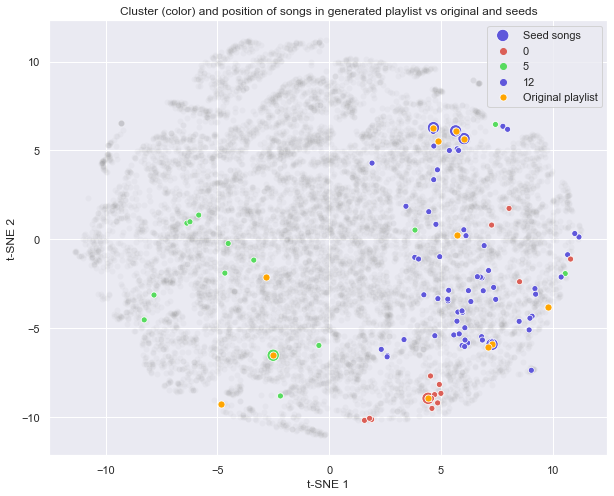

In [504]:
plt.figure(figsize=(10, 8))

ax = sns.scatterplot(
    x = tsne_results[tsne_ind, 0], 
    y = tsne_results[tsne_ind, 1],
    color = 'grey',
    alpha = 0.05
)

ax = sns.scatterplot(
    x = tsne_results[new_songs_ind[0:6], 0], 
    y = tsne_results[new_songs_ind[0:6], 1],
    hue = kmeans.labels_[new_songs_ind[0:6]],
    palette = sns.color_palette("hls", len(np.unique(kmeans.labels_[new_songs_ind[0:6]]).reshape((-1,)))),
    #edgecolor = 'orange',
    alpha = 1,
    legend = None,
    label = 'Seed songs',
    s = 150
)

ax = sns.scatterplot(
    x = tsne_results[new_songs_ind, 0], 
    y = tsne_results[new_songs_ind, 1],
    hue = kmeans.labels_[new_songs_ind],
    palette = sns.color_palette("hls", len(np.unique(kmeans.labels_[new_songs_ind]).reshape((-1,)))),
    legend = "full",
    alpha = 1
)

ax = sns.scatterplot(
    x = tsne_results[playlist_song_ind, 0], 
    y = tsne_results[playlist_song_ind, 1],
    color = 'orange',
    #legend = None,
    label = 'Original playlist',
    alpha = 1,
    s = 50
)

ax.set(title = 'Cluster (color) and position of songs in generated playlist vs original and seeds', 
       xlabel = 't-SNE 1', ylabel = 't-SNE 2')

plt.savefig('generated_playlist_1.pdf'.format(time.time()))